# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 35 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  40 баллов
* Задача 4 &mdash;  15 баллов




-----

In [201]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

#### <b><font color="blue">Легкая часть</font></b>
### Задача 1

В данной задаче мы продолжим работать с датасетом о диабете, с которым вы познакомились на занятии.

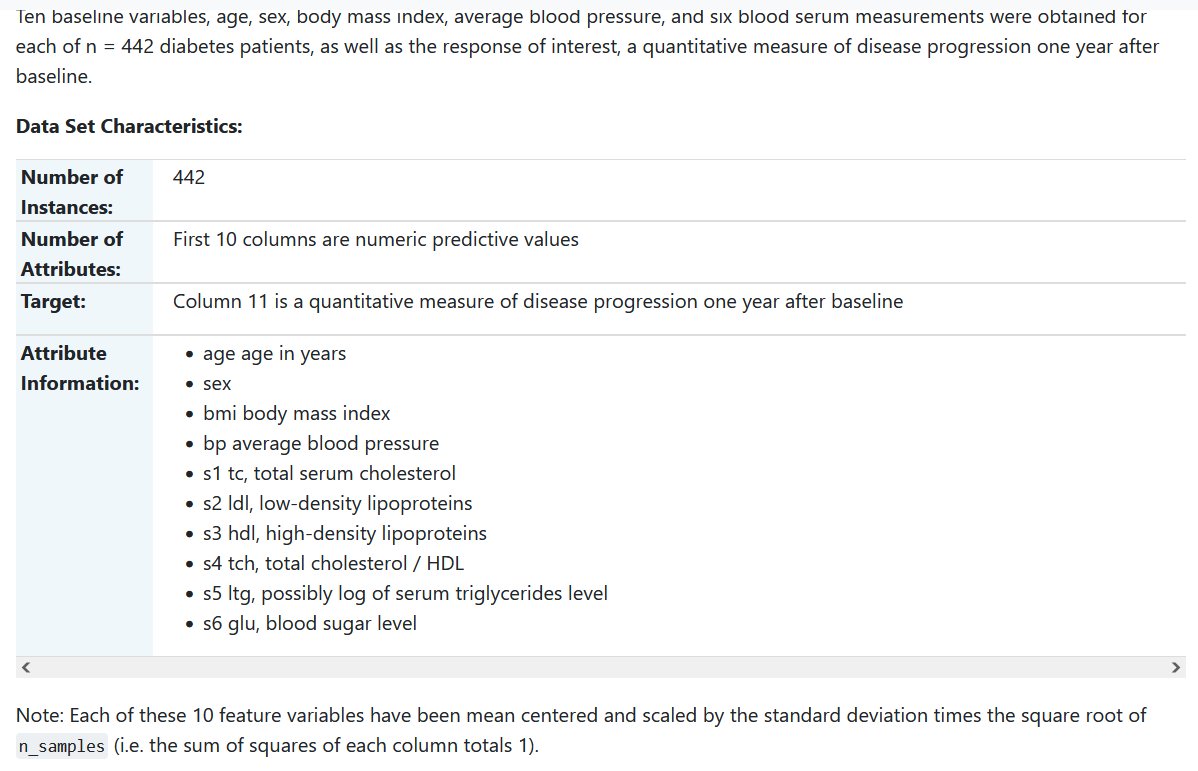

In [2]:
data = load_diabetes()
X, y = data['data'], data['target']

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

In [5]:
#X_train, X_test, y_train, y_test = <...>
X_train, X_test = train_test_split(X, test_size=0.3)
y_train, y_test = train_test_split(y, test_size=0.3)

Реализуйте линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [7]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = np.shape(X)
        
        # похуй на возможную вырожденность, и так ошибку увидим
        # а питон не помрет
        
        self.theta = (np.transpose(Y) @ X) @ np.linalg.inv(np.transpose(X) @ X)
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        return X @ self.theta
        
        
        #y_pred = <...>
        #return <...>

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

Идея в том, что добавление своб члена эквивалетно добавлению столбца единиц в матрицу-регрессор $X$, так и поступим.

In [28]:
# создаем нашу модель линейной регрессии и обучаем
my_model_int = MyLinearRegression()
b = np.ones((np.shape(X_train)[0],1))
my_model_int.fit(np.concatenate( (X_train, b), axis = 1), y_train)

# создаем scikit модель и обучаем
model_int = LinearRegression(fit_intercept = True)
model_int.fit(X_train, y_train)

print("Признаки для моей регрессии: ", my_model_int.theta)
print("Признаки для scikit регрессии: ", model_int.coef_, model.intercept_)

Признаки для моей регрессии:  [ 310.567122   -150.42233761  -95.72091026   28.15052077  200.50452917
 -185.29999438 -154.45181589  -78.19724021  -28.26209073   75.69889446
  149.3085464 ]
Признаки для scikit регрессии:  [ 310.567122   -150.42233761  -95.72091026   28.15052077  200.50452917
 -185.29999438 -154.45181589  -78.19724021  -28.26209073   75.69889446] 149.308546403446


Отлично, значения сходятся.

Теперь обучите модель без свободного члена.

In [40]:
# создаем нашу модель линейной регрессии и обучаем
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)

# создаем scikit модель и обучаем
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

print("Признаки для моей регрессии: ", my_model.theta, "\n")
print("Признаки для scikit регрессии: ", model.coef_, "\n")
print("Относительные разницы значений: ", np.abs( (my_model.theta - model.coef_) / model.coef_) )


Признаки для моей регрессии:  [  388.23078513  -344.93301931   -89.69568947   198.82953536
  2447.8939164  -1739.40689346 -1309.79911204  -593.72435291
 -1042.13536546   179.23412703] 

Признаки для scikit регрессии:  [  388.23078513  -344.93301931   -89.69568947   198.82953536
  2447.8939164  -1739.40689346 -1309.79911204  -593.72435291
 -1042.13536546   179.23412703] 

Относительные разницы значений:  [3.95324732e-15 4.28468371e-15 1.48928042e-14 5.28896900e-15
 5.20158400e-14 5.62092060e-14 4.79120301e-14 3.75302446e-14
 4.53815560e-14 7.92865452e-15]


Отлично, и теперь значения сходятся!

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [38]:
def print_errors(y_pred, y_test):
    print("MSE: ", np.sqrt(((y_test - y_pred) ** 2).mean()))
    print("MAE: ", np.abs(y_test - y_pred).mean())
    print("MAPE, %: ", 100 * np.abs( (y_test - y_pred) / y_pred ).mean())

Поскольку значения сходятся, то для практики пущей поиспользуем scikit-модель. Посчитаем разные метрики, как и на семинаре

<h2> Модель без сдвига </h2>

In [41]:
y_pred = model.predict(X_test)
print_errors(y_pred, y_test)

MSE:  185.91959948372644
MAE:  165.06356389377788
MAPE, %:  6322.699529559738


<h2> Модель со сдвигом </h2>

In [42]:
y_pred = model_int.predict(X_test)
print_errors(y_pred, y_test)

MSE:  82.32255551739945
MAE:  71.04311327504233
MAPE, %:  48.04570234134424


Сделайте выводы.

**Вывод:** Значительно лучше получаются результаты со сдвигом. Так что, если он не с особо большой погрешностью определен, то лучше сдвиг оставлять, я так думаю. Да и, если он прям есть, то это неспроста, и нужно его (физический) смысл сыскать.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [43]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        # это для Elastic-регрессии с 2 параметрами
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(12, 6)):
    
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)   

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### **Профиль биология**

Скачайте данные <a href="https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring">`Parkinsons telemonitoring`</a>. Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [ ]:
data = pd.read_csv('parkinsons_updrs.data', sep=',')
data.info()

In [ ]:
data.head()

**1.** Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (паценты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [ ]:
<...>


Разбейте данные на обучающую и тестирующие выборки в соотношении. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы. Реализуйте разделение на тренировочную и тестовую выборки с учетом того, чтобы разные пациенты попали в разные выборки (вы моежете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например `GroupShuffleSplit`). 

**Также, выведите что-либо, подтверждающее данное свойство.**



In [ ]:
<...>

Разделяйте выборку в отношении примерно 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [ ]:
<...>

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** <...>



Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [ ]:
X_train_stand = <...>
X_test = <...>


**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. 

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [ ]:
<...>

**Ответ:**

#### **Профиль физика и профиль химия**

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице (сокращенный вид), которые действуют как молекулярные признаки. 300-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа (этот столбец для обучения не нужен). 301-й столбец — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso, этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*

Кулоновская матрица системы зарядов - это матрица из энергий взаимодействия зарядов друг с дружкой (и с самими собой - на диагонали).

In [45]:
data = pd.read_csv('physics_data.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Разделите данные на признаки $X$ и целевые переменные $y$.

С практической точки зрения нас интересует формула для вычисления энергии, поэтому последний столбец $E_{at}$ - то, что мы хотим предсказывать, то бишь целевая переменная. Тогда остальное - это признаки, кроме, разве что, Pubchem id, поскольку это просто номер молекулы, и эта нумерация может быть произвольной. 

In [53]:
y = data['Eat'].values
X = data.iloc[:, 1:301].values
print(X)

[[-5.48250750e+01 -8.35718578e-01  4.52405150e+01 ...  1.18049148e-02
  -3.62149676e-02  5.21803580e-02]
 [-3.40398324e+01  2.49307029e+01 -7.48556160e+00 ...  4.37719279e-03
   4.02296425e-03  3.35555229e-03]
 [-5.87942578e+01 -4.98234479e+01 -3.50620803e+01 ...  1.27956759e-02
   2.22696075e-02  8.05056223e-03]
 ...
 [-3.86552416e+01  1.19679153e+01 -1.29532990e+01 ...  1.72682596e-03
   1.45641823e-02  9.90689733e-03]
 [-4.60562297e+01  1.80840907e+01  3.90774548e+01 ...  4.93122676e-04
   3.52977286e-03  2.47137275e-03]
 [-4.56431367e+01  2.27302557e+01  4.73011261e+01 ... -3.61789422e-02
  -5.10955753e-02 -1.54064372e-02]]


Разделите выборку в отношении 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [69]:
X_train, X_test = train_test_split(X, test_size=0.3)
y_train, y_test = train_test_split(y, test_size=0.3)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Стандартизация необходима, поскольку у признаков может быть разный масштаб, и чтобы наша регуляризация не похерила зависимость от признаков с меньшими значениями.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [56]:
scaler= StandardScaler()
# обучаем на тестовой выборке

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать **оптимальные** параметры регуляризации.

<h2> Ridge-регрессия</h2>

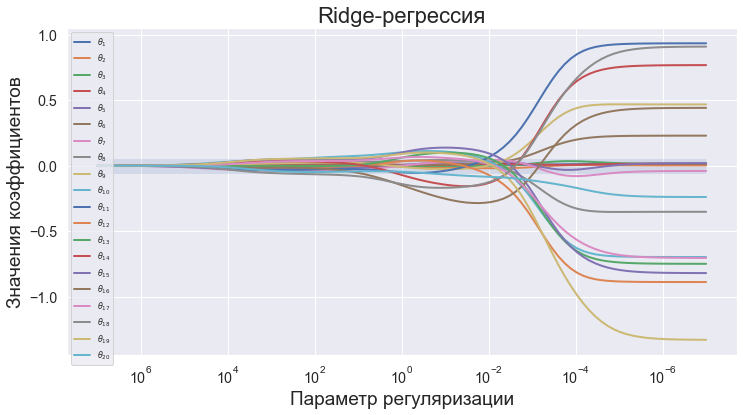

In [89]:
# создаем модель и на всякий учитываем и сдвиг
model = Ridge(fit_intercept = True)

# считаем коэффициенты
log_min = -7
log_max = 7
num = 100
coefs = calculate_coef(model, X_train, y_train, log_min, log_max, num)

draw_track(coefs, log_min, log_max, num, title="Ridge-регрессия")

<h2> Lasso-регрессия </h2>

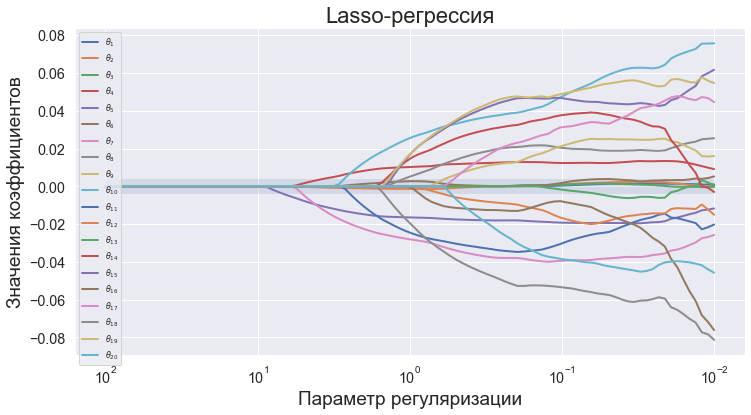

In [93]:
# создаем модель и на всякий учитываем и сдвиг
model = Lasso(fit_intercept = True)

# считаем коэффициенты
log_min = -2
log_max = 2
num = 100
coefs = calculate_coef(model, X_train, y_train, log_min, log_max, num)

draw_track(coefs, log_min, log_max, num, title="Lasso-регрессия")

<h2> Elastic-регрессия </h2>

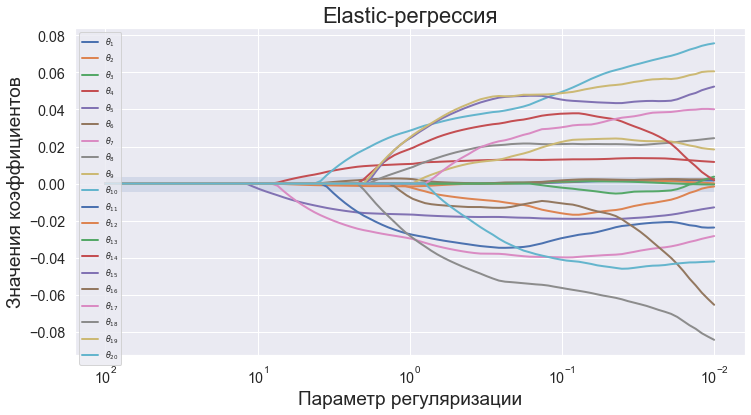

In [97]:
# создаем модель и на всякий учитываем и сдвиг
model = ElasticNet(fit_intercept = True)

# считаем коэффициенты
log_min = -2
log_max = 2
num = 100
coefs = calculate_coef(model, X_train, y_train, log_min, log_max, num)

draw_track(coefs, log_min, log_max, num, title="Elastic-регрессия")

Неслучайно Elastic получилась похожа на Lasso. По определению, это сумма регуляризаций из Ridge (2-норма) 
и Lasso (1-норма). И мы в этой реализации пропорционально скейлим оба параметра. В результате зануление коэффициентов поглаже, конечно, чем у Lasso, но поведение в целом весьма похоже

**Ответ:** Пипец как сильно зависят значения коэффициентов от регуляризации. Но у Ridge, конечно же, поменьше. Ну а чтобы понять, какую регуляризацию брать, нужно, видимо явно ошибки строить и смотреть, чего они да как они предсказывают.

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

In [112]:
# копируем то, что уже было, только теперь меняем l1_ratio, а не альфу

def Elastic_draw_track(model, X, y, l_min, l_max, 
               num, title='', figsize=(12, 6)):
    """Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации l1
    и строит графики траекторий эволюции этих признаков
    в зависимости от изменения параметра
    """
    
    # l_min, l_max - границы для l1-параметра. лежат от 0 до 1, по определению
    
    l1_s = np.linspace(l_min, l_max, num)   
    coefs = []
    # оставляем alphf = 1, l1 меняем
    for a in l1_s:
        model.set_params(l1_ratio=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(l1_s, coef, linewidth=2, label=label)
        ind += 1
        
    #ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029.3752114514125, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(


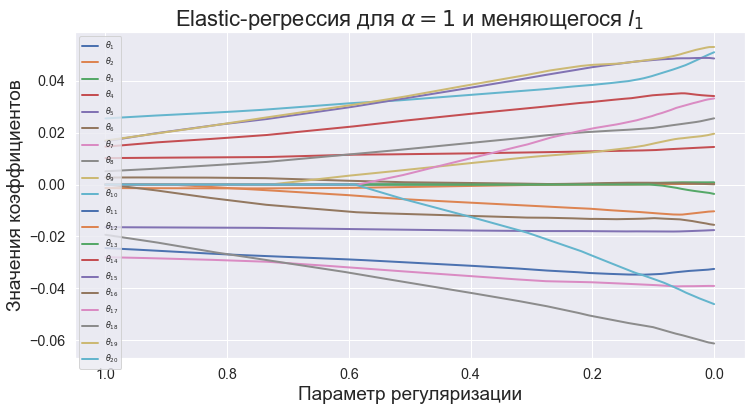

In [113]:
model = ElasticNet(fit_intercept = True)
Elastic_draw_track(model, X_train, y_train, 0, 1, 1000, title="Elastic-регрессия для $\\alpha=1$ и меняющегося $l_1$")

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** я не оч вдупляю, как из этого графика увидеть оптимальность, но здравый смысл подсказывает, что где-то посередине. так что предустановленное значение $l_1 = 1/2$ - не такой уж и плохой выбор?? Наверное.


**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [115]:
# создаем и обучаем модель
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [116]:
# находим предсказанные значения
y_pred = model.predict(X_test)

linreg = {}
# функции уже реализованы в scikit
linreg['MSE'] = mean_squared_error(y_pred, y_test)
linreg['MAE'] = mean_absolute_error(y_pred, y_test)
linreg['MAPE'] = mean_absolute_percentage_error(y_pred, y_test)

print(linreg)

{'MSE': 266.32191247682255, 'MAE': 11.103217796210213, 'MAPE': 5.1987252576304295}


<b>Неожиданно хорошо даже работает как-то.. ну, физика - это вам не диабетики.</b>

Реализуйте функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [212]:
def draw_errors(error, error_name, alphas, X_train, y_train, X_test, y_test, ylim=(None, None)):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    error - функция, вычисляющая ошибку
    error_name - имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    alphas - массив величин alpha
    
    """
    
    l1_arr = [0.3, 0.5, 0,7]
    
    plt.figure(figsize=(10,8))
    
    # создаем словарь для графиков по схеме errors = {"label": [values], ...}
    errors = {"Ridge" : [], "Lasso": [], "Elastic, 1": [], "Elastic, 2": [], "Elastic, 3": []}
    
    # также построим лин регрессию (без регуляризаций) для сравнения на том же графике
    #model = LinearRegression(fit_intercept=True)
    #model.fit(X_train, y_train)
    #errors["Linear Regression"] = np.ones(np.size(alphas)) * error(model.predict(X_test), y_test) 
    # по итогу, не будем строить просто линирегрессию, ибо ошибки сильно большие и диапазон задирается
    
    
    # наверное, можно это все красиво в цикл запихать, но пох
    
    # Ridge
    model = Ridge(fit_intercept = True)
    # модель можно создать одну, но параметры менять и потом перефитировать
    for alpha in alphas:
        model.set_params(alpha = alpha)
        model.fit(X_train, y_train)
        errors["Ridge"].append(error(model.predict(X_test), y_test))
    
    # Lasso
    model = Lasso(fit_intercept = True)
    for alpha in alphas:
        model.set_params(alpha = alpha)
        model.fit(X_train, y_train)
        errors["Lasso"].append(error(model.predict(X_test), y_test)) 
    
    # Elastic, l_1 = 0.2
    model = ElasticNet(fit_intercept = True)
    model.set_params(l1_ratio = l1_arr[0])
    for alpha in alphas:
        model.set_params(alpha = alpha)
        model.fit(X_train, y_train)
        errors["Elastic, 1"].append(error(model.predict(X_test), y_test))
        
    # Elastic, l_1 = 0.2
    model = ElasticNet(fit_intercept = True)
    model.set_params(l1_ratio = l1_arr[1])
    for alpha in alphas:
        model.set_params(alpha = alpha)
        model.fit(X_train, y_train)
        errors["Elastic, 2"].append(error(model.predict(X_test), y_test))
        
    # Elastic, l_1 = 0.2
    model = ElasticNet(fit_intercept = True)
    model.set_params(l1_ratio = l1_arr[2])
    for alpha in alphas:
        model.set_params(alpha = alpha)
        model.fit(X_train, y_train)
        errors["Elastic, 3"].append(error(model.predict(X_test), y_test))    
    
    for label in errors.keys():
        plt.plot(alphas, errors[label], label=label)
    
    plt.title("Графики " + error_name + " ошибки для разных моделей в зависимости от параметра")
    # лог масштаб
    plt.xscale("log")
    #plt.ylim(ylim)
    plt.legend()
    plt.show()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [219]:
alphas = np.logspace(-1.5, 3, 100)

<h2> MSE </h2>

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719.882924260493, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1734.3813218903022, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.4529491907863, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.0295546343127, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138.5890662763836, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142.8400478751273, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2147.1417908090925, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.57139420491, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2263.5834176171793, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2266.4910485451046, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

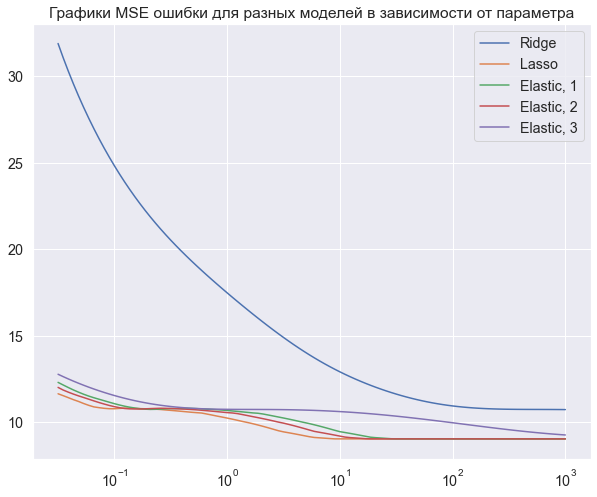

In [220]:
draw_errors(mean_squared_error, "MSE", alphas, X_train, y_train, X_test, y_test)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.022566266305, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714.9721989238392, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1838.0381375585303, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1841.9026750172045, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845.7327500027875, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939.6137460313744, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.5020799547299, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945.358676858528, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014.6013473662008, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016.54079458946, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

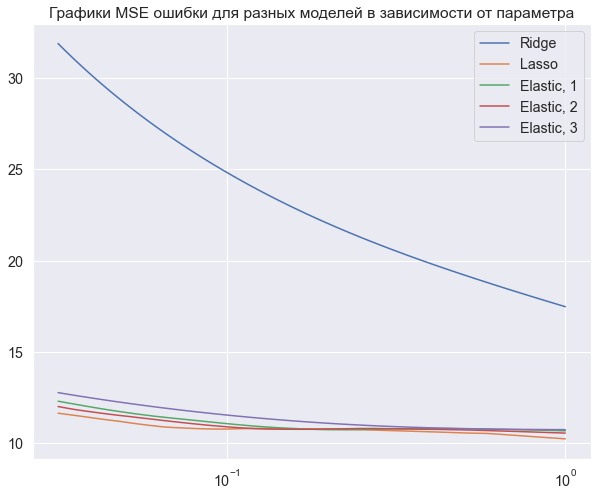

In [230]:
draw_errors(mean_squared_error, "MSE", np.logspace(-1.5,0,100), X_train, y_train, X_test, y_test)

<h2> MAE </h2>

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719.882924260493, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1734.3813218903022, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.4529491907863, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.0295546343127, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138.5890662763836, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142.8400478751273, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2147.1417908090925, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.57139420491, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2263.5834176171793, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2266.4910485451046, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

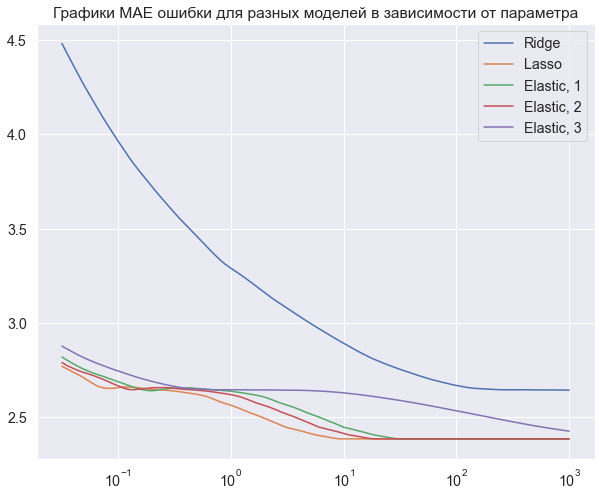

In [222]:
draw_errors(mean_absolute_error, "MAE", alphas, X_train, y_train, X_test, y_test, ylim = (0,20) )

<h2> MAPE </h2>

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719.882924260493, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1734.3813218903022, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.4529491907863, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.0295546343127, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138.5890662763836, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142.8400478751273, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2147.1417908090925, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.57139420491, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2263.5834176171793, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2266.4910485451046, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

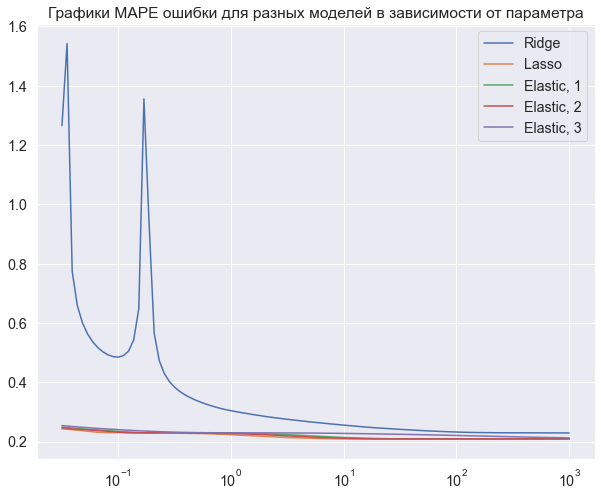

In [223]:
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test, ylim = (0,20) )

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.022566266305, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714.9721989238392, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1838.0381375585303, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1841.9026750172045, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845.7327500027875, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939.6137460313744, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.5020799547299, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945.358676858528, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014.6013473662008, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016.54079458946, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

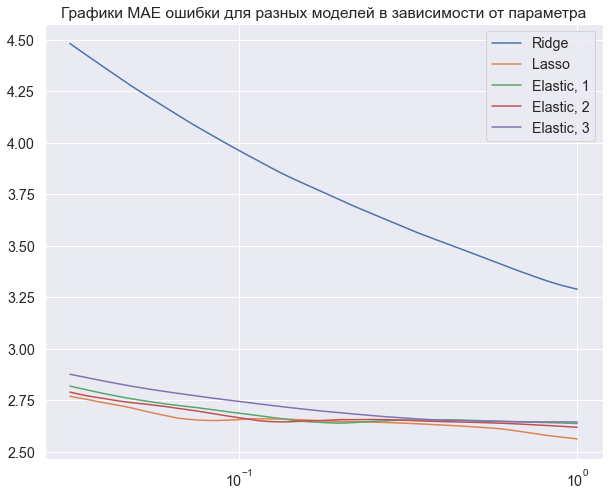

In [228]:
draw_errors(mean_absolute_error, "MAE", np.logspace(-1.5,0,100), X_train, y_train, X_test, y_test, ylim = (0,20) )

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.0340951094313, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.022566266305, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714.9721989238392, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1838.0381375585303, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1841.9026750172045, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845.7327500027875, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939.6137460313744, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.5020799547299, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945.358676858528, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2012.6342421158688, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014.6013473662008, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016.54079458946, tolerance: 0.4623136595294682
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

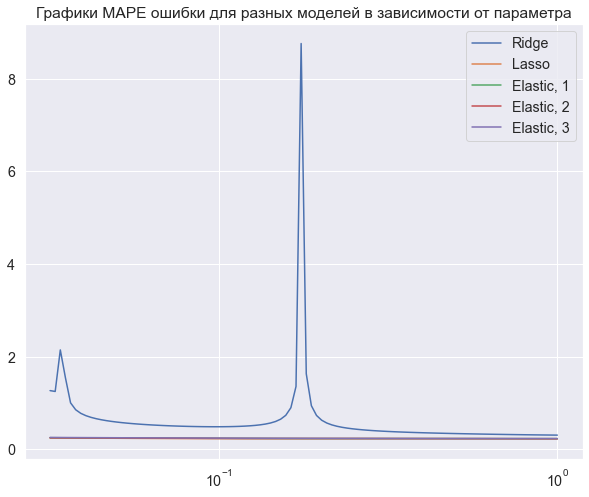

In [229]:
draw_errors(mean_absolute_percentage_error, "MAPE", np.logspace(-1.5,0,100), X_train, y_train, X_test, y_test, ylim = (0,20) )

**3.** Сделайте общий вывод по задаче.

**Вывод:** 

Как видим, модели с регуляторами оказались куда лучше в плане ошибки (от 50 до 100 раз так-то!). На самом деле, это говорит о том, что обычная регрессия здесь переобучалась (штраф для больших весов как раз препятствует переобучению, то есть, условно, нельзя провести полином через все точки). А модели с регуляторами все-таки проводили "сглаживающие" прямые. Также отличие l1-регуляризаций от l2 в том, что им выгодно занулить вклад признака начиная с какого-то момента. Видимо, поскольку еще и признаки были лишние (или линейно-зависимые), l1-регуляризация их откидывала и поэтому ошибка получалась сильно меньше.

Что же касается выбора оптимального параметра регуляризации, то брать его слишком большим - тоже плохо, так как, видимо, вырастут погрешности. Так что я бы брал его либо из лок минимума около единицы, либо из точки перегиба. Но вообще - хз. 

### Задача 4
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.


Очев. Минимизируем:

$$
 M = (Y - X \theta)^T W (Y - X \theta), \qquad W = \text{diag}(w_1, \ldots, w_n).
$$

Получаем ответ:

$$
    \theta = (X^T W X)^{-1} X^T W Y
$$